/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


Computing UMAP projection


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


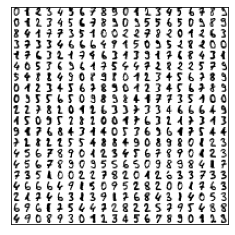

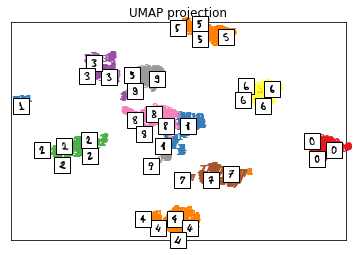

Computing PCA projection


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


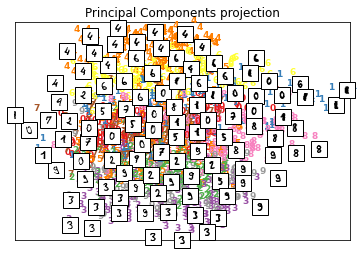

Computing Linear Discriminant Analysis projection


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


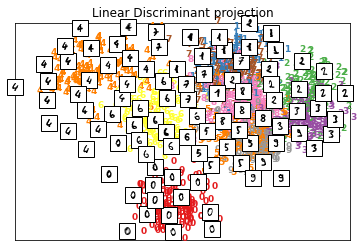

Computing MDS embedding
Done. Stress: 454558247.010217


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


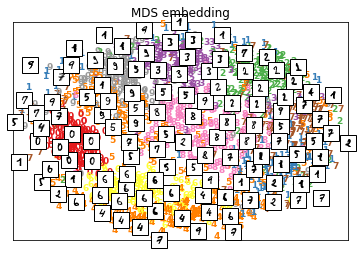

Computing t-SNE embedding


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


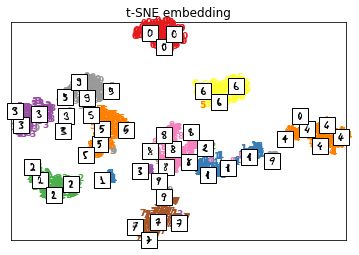

Computing Spectral embedding


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


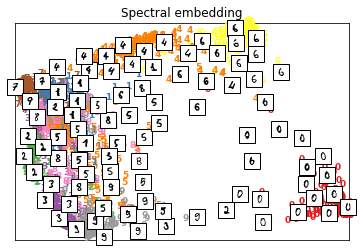

Computing LLE embedding


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


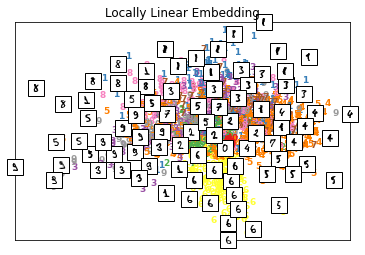

Computing Isomap projection


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


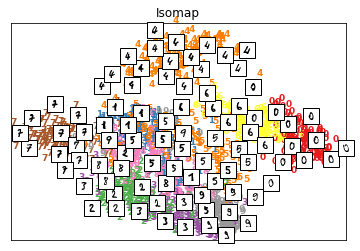

Computing kPCA


/home/patel_zeel/miniconda3/envs/probml_py3912/lib/python3.9/site-packages/probml_utils/plotting.py:74: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


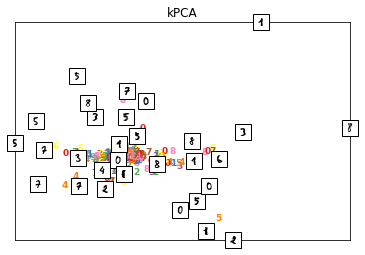

In [1]:
# Modified from
# https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
"""
An illustration of various embeddings on the UCI digits dataset.

UMAP and t-SNE do not use label information.
t-SNE will be initialized with the embedding that is generated by PCA in this example, which is not the default setting.
 It ensures global stability of the embedding, i.e., the embedding does not depend on random initialization.

Linear Discriminant Analysis, from the sklearn.discriminant_analysis module, and Neighborhood Components Analysis,
from the sklearn.neighbors module, are supervised dimensionality reduction method, i.e. they make use of the provided labels, contrary to other methods.
"""

# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

figdir = "figures"

import os

try:
    from probml_utils import savefig
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig


from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn import manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection, neighbors

try:
    import umap  # # https://github.com/lmcinnes/umap
except ModuleNotFoundError:
    %pip install -qq umap-learn
    import umap  # # https://github.com/lmcinnes/umap

digits = datasets.load_digits()  # n_class=6)
X = digits.data
y = digits.target  # 0..9
n_samples, n_features = X.shape
n_neighbors = 30


# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        # color=y[i] / 10.0
        color = (y[i] + 1) / 11.0  # ensure each digit gets unique color
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(color), fontdict={"weight": "bold", "size": 9})

    if hasattr(offsetbox, "AnnotationBbox"):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1.0, 1.0]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


# ----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix : ix + 8, iy : iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
# plt.title('A selection from the 64-dimensional digits dataset')
savefig("manifold_digits_data.pdf")


# ----------------------------------------------------------------------

print("Computing UMAP projection")
X_umap = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, metric="correlation").fit_transform(X)
plot_embedding(X_umap, "UMAP projection")
savefig("manifold_digits_umap.pdf")
plt.show()


# ----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca, "Principal Components projection")
savefig("manifold_digits_pca.pdf")
plt.show()

# ----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda, "Linear Discriminant projection")
savefig("manifold_digits_lda.pdf")
plt.show()

# ----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds, "MDS embedding")
savefig("manifold_digits_mds.pdf")
plt.show()

# ----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "t-SNE embedding")
savefig("manifold_digits_tsne.pdf")
plt.show()

# ----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0, eigen_solver="arpack")
X_se = embedder.fit_transform(X)
plot_embedding(X_se, "Spectral embedding")
savefig("manifold_digits_SE.pdf")
plt.show()

# ----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
embedder = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method="standard")
X_lle = embedder.fit_transform(X)
plot_embedding(X_lle, "Locally Linear Embedding")
savefig("manifold_digits_LLE.pdf")
plt.show()

# ----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap projection")
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)
plot_embedding(X_iso, "Isomap")
savefig("manifold_digits_isomap.pdf")
plt.show()

# ----------------------------------------------------------------------
from sklearn.decomposition import KernelPCA

print("Computing kPCA")
transformer = KernelPCA(n_components=2, kernel="rbf", gamma=10)
X_kpca = transformer.fit_transform(X)
plot_embedding(X_kpca, "kPCA")
savefig("manifold_digits_kPCA.pdf")
plt.show()